In [37]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
chrN = 18
low_res_HiC_file_path = "../data/GM12878_primary_down/10kb_resolution_intrachromosomal/chr" + str(chrN) + "_10kb_down.RAWobserved"
high_res_HiC_file_path = "../data/GM12878_primary/10kb_resolution_intrachromosomal/chr" + str(chrN) + "/MAPQG0/chr" + str(chrN) + "_10kb.RAWobserved"
low_res_HiC_matrix_file_path = "../data/GM12878_primary_down/10kb_resolution_intrachromosomal/chr" + str(chrN) + "_10kb_down.RAWobserved_npy_form_tmp.npy"
high_res_HiC_matrix_file_path = "../data/GM12878_primary/10kb_resolution_intrachromosomal/chr" + str(chrN) + "/MAPQG0/chr" + str(chrN) + "_10kb.RAWobserved_npy_form_tmp.npy"
if os.path.exists(high_res_HiC_matrix_file_path):
    high_res_HiC_matrix = np.load(high_res_HiC_matrix_file_path)
else:
    high_res_HiC_matrix = utils.readSquareMatrix(high_res_HiC_file_path, total_length, resolution_size)
if os.path.exists(low_res_HiC_matrix_file_path):
    low_res_HiC_matrix = np.load(low_res_HiC_matrix_file_path)
else:
    low_res_HiC_matrix = utils.readSquareMatrix(low_res_HiC_file_path, total_length, resolution_size)


In [38]:
def vec_of_dist(matrix, x):
    return([matrix[i,i+x] for i in range(matrix.shape[1]-x)])


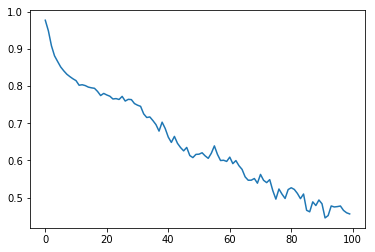

In [39]:
corr_list = []
for dist in range(100):
    low_res_vec = vec_of_dist(low_res_HiC_matrix, dist)
    high_res_vec = vec_of_dist(high_res_HiC_matrix, dist)
    corr_list.append(pearsonr(low_res_vec, high_res_vec)[0])
    
plt.plot(corr_list)
#plt.axis([0, 6, 0, 20])
plt.show()
